In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [52]:
import quandl

In [53]:
from pandas_datareader import data as pdr

In [55]:
bitcoin = quandl.get("BCHAIN/MKPRU")

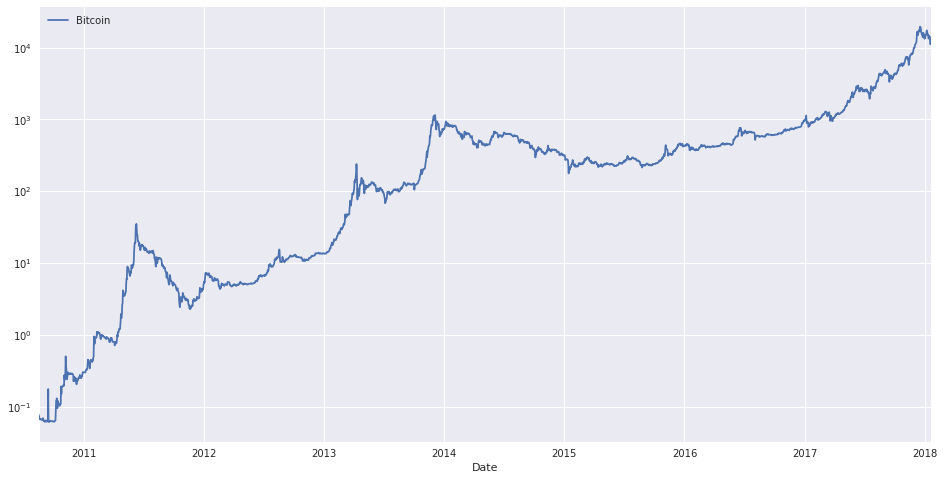

In [56]:
bitcoin.columns = ['Bitcoin']
bitcoin['Bitcoin'].replace(0, np.nan, inplace=True)
bitcoin = bitcoin.dropna()
bitcoin.Bitcoin.plot(logy=True);
plt.legend();

In [57]:
bitcoin['Returns'] = (bitcoin['Bitcoin'].pct_change() + 1).fillna(1)
bitcoin.head()

,Bitcoin,Returns
Date,,
2010-08-17,0.076900,1.000000
2010-08-18,0.074000,0.962289
2010-08-19,0.068800,0.929730
2010-08-20,0.066700,0.969477
2010-08-21,0.066899,1.002984


In [58]:
DJIA_fred = pdr.DataReader('DJIA', 'fred') # data from 2010 til present
DJIA_quandl = quandl.get('BCB/UDJIAD1') # data from 1896 til 2016

In [59]:
DJIA_quandl.head()

,Value
Date,
1896-07-14,33.43
1896-07-15,32.28
1896-07-16,31.95
1896-07-17,31.94
1896-07-18,31.50


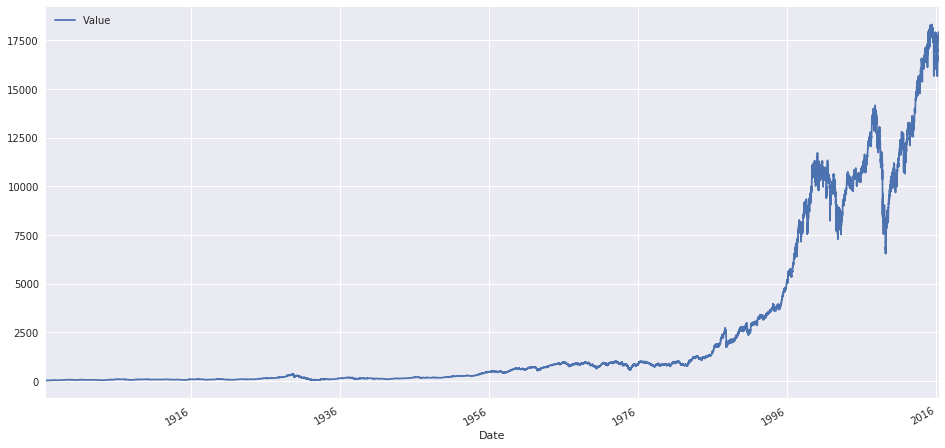

In [60]:
DJIA_quandl.plot();

In [61]:
DJIA_fred.head()

,DJIA
DATE,
2010-01-01,NaN
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86


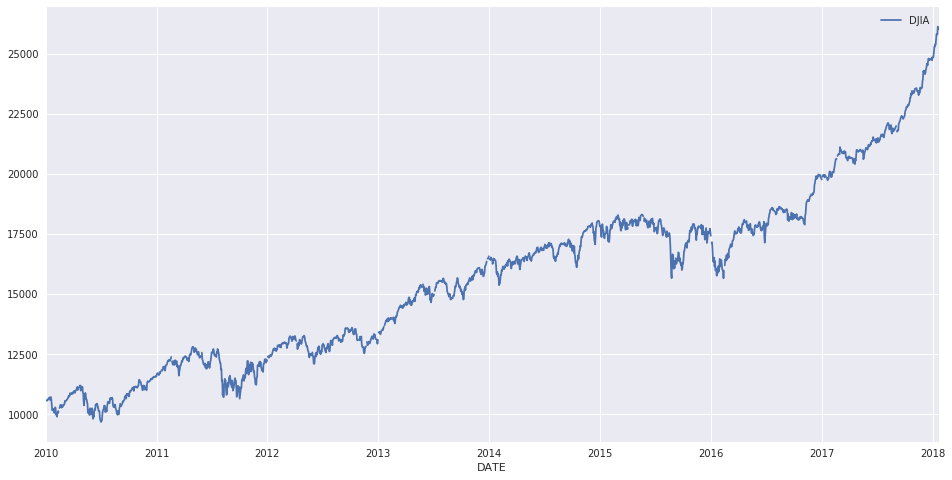

In [62]:
DJIA_fred.plot()

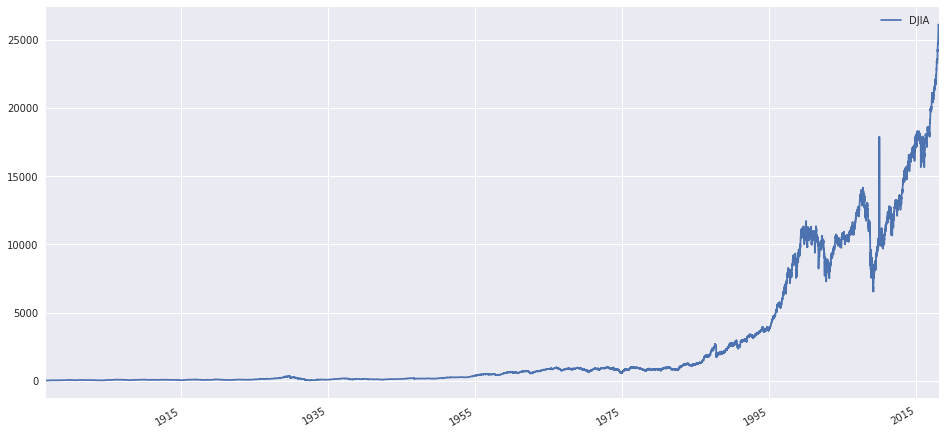

In [63]:
# Combine DJIA data from both sources 

DJIA = DJIA_quandl.append(DJIA_fred)
DJIA.DJIA = DJIA.DJIA.fillna(DJIA.Value)
DJIA = DJIA.drop('Value', axis=1)
DJIA.columns = ['DJIA']
DJIA.DJIA.fillna(method='pad', inplace=True)
DJIA.plot();

In [64]:
DJIA['Returns'] = (DJIA.DJIA.pct_change() + 1).fillna(1)
DJIA.tail()

,DJIA,Returns
2018-01-15,25803.19,1.000000
2018-01-16,25792.86,0.999600
2018-01-17,26115.65,1.012515
2018-01-18,26017.81,0.996254
2018-01-19,26071.72,1.002072


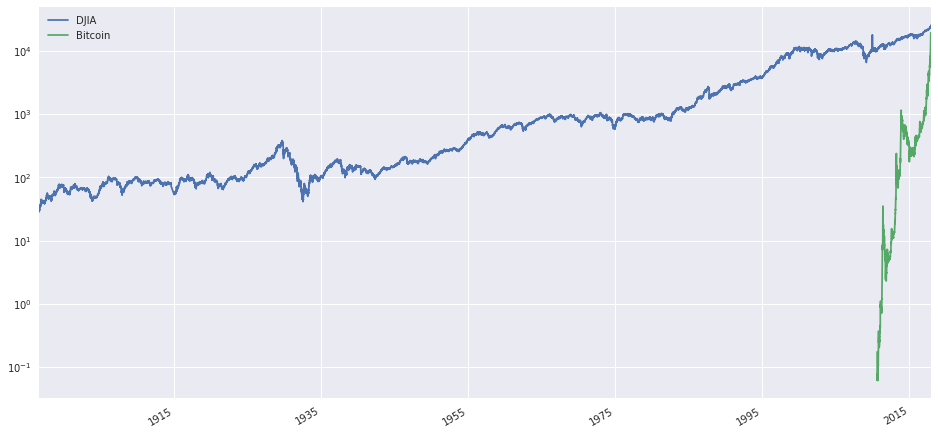

In [65]:
prices = pd.DataFrame(DJIA.DJIA).join(bitcoin.Bitcoin)
prices.plot(logy=True);

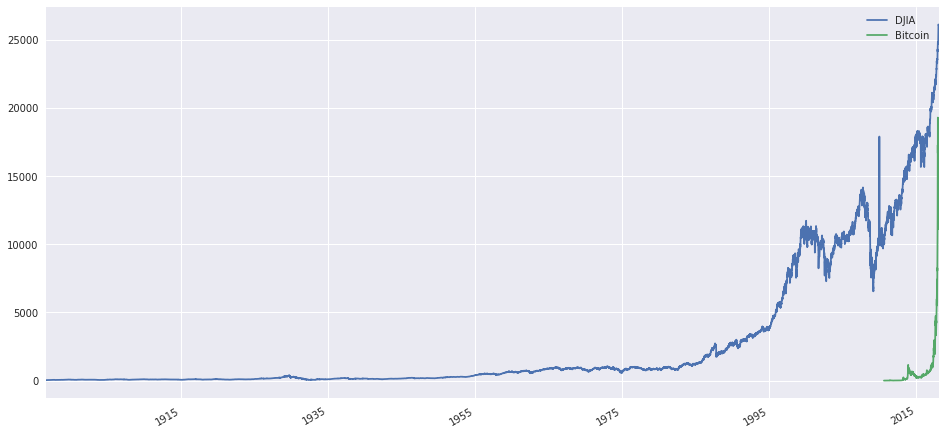

In [66]:
prices = pd.DataFrame(DJIA.DJIA).join(bitcoin.Bitcoin)
prices.plot(logy=False);